In [99]:
import pandas as pd
import numpy as np
from numpy import median
import requests
import tweepy
import os
import json
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from datetime import datetime as dt
import re

## Gathering Data
> This dataset collects information from The WeRateDogs Twitter archive<br>

> Import the csv file provided at the Project Details section

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


The tweet image predictions will be downloaded programmatically. This file is the result of a neural network dog breed classifier.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
images = pd.read_csv('image_predictions.tsv', sep='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Query Twitter API for each tweet in the Twitter archive and save JSON in a text file<br>
These are hidden to comply with Twitter's API terms and conditions

In [5]:
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
OAUTH_TOKEN = ""
OAUTH_TOKEN_SECRET = ""

In [6]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

In [7]:
# # List of the error tweets
# error_list = []
# # List of tweets
# df_list = []
# # Calculate the time of execution
# start = time.time()

# # For loop which will add each available tweet json to df_list
# for tweet_id in archive['tweet_id']:
#     try:
#         tweet = api.get_status(tweet_id, tweet_mode='extended',
#                                wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
#         favorites = tweet['favorite_count'] # How many favorites the tweet had
#         retweets = tweet['retweet_count'] # Count of the retweet
#         user_followers = tweet['user']['followers_count'] # How many followers the user had
#         user_favourites = tweet['user']['favourites_count'] # How many favorites the user had
#         date_time = tweet['created_at'] # The date and time of the creation
        
#         df_list.append({'tweet_id': int(tweet_id),
#                         'favorites': int(favorites),
#                         'retweets': int(retweets),
#                         'user_followers': int(user_followers),
#                         'user_favourites': int(user_favourites),
#                         'date_time': pd.to_datetime(date_time)})
#     except Exception as e:
#         print(str(tweet_id)+ " _ " + str(e))
#         error_list.append(tweet_id)
# # Calculate the time of excution
# end = time.time()
# print(end - start)

In [8]:
# # Create DataFrames from list of dictionaries
# json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
#                                                'user_followers', 'user_favourites', 'date_time'])
# # Save the dataFrame in file
# json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [9]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

## Gathering Summary: 
> Getting data from an existing file (twitter-archive-enhanced.csv) Reading from csv file using pandas <br>
> Downloading a file from the internet (image-predictions.tsv) Downloading file using requests <br>
> Querying an API (tweet_json.txt) Get JSON object of all the tweet_ids using Tweepy <br>

## Assessing

### 1) Archive dataset

In [10]:
# get some samples
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1178,719551379208073216,NaN,NaN,2016-04-11 15:43:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harnold. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719551379...,10,10,Harnold,None,None,None,None
2303,666996132027977728,NaN,NaN,2015-11-18 15:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carll. He wants to be a donkey. But al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666996132...,10,10,Carll,None,None,None,None
1802,676949632774234114,NaN,NaN,2015-12-16 02:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyrus. He's a Speckled Centennial Tico...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676949632...,8,10,Tyrus,None,None,None,None
1871,675147105808306176,NaN,NaN,2015-12-11 02:56:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're presenting a group project and the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675147105...,10,10,None,None,None,None,None
1296,707969809498152960,NaN,NaN,2016-03-10 16:42:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rufus. He's a Honeysuckle Firefox. Curly ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707969809...,11,10,Rufus,None,None,None,None
1390,700151421916807169,NaN,NaN,2016-02-18 02:54:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If a pupper gave that to me I'd probably start...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700151421...,11,10,None,None,None,pupper,None
2004,672466075045466113,NaN,NaN,2015-12-03 17:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franq and Pablo. They're working hard ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672466075...,12,10,Franq,None,None,None,None
595,798701998996647937,NaN,NaN,2016-11-16 01:39:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We normally don't rate marshmal...,7.186315e+17,4.196984e+09,2016-04-09 02:47:55 +0000,https://twitter.com/dog_rates/status/718631497...,10,10,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
1287,708356463048204288,NaN,NaN,2016-03-11 18:18:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. That is his castle. He protect...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708356463...,10,10,Oliver,None,None,None,None


* 'source' has html residues
* doggo, floofer, pupper and puppo represents one variable and due to tidiness rule have to be one column

In [11]:
# Assessing the data programmaticaly
archive.info()
archive.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# View rows where the value of 'name' is lowercase - indicates that it is not an actual name
archive.loc[(archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [13]:
# View number of entries for each source
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
# check if denominator = 0
archive[archive['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [15]:
#Orignal Tweets 
archive[archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
# Sort values of 'name' column alphabetically
archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [17]:
# Check duplicates
archive.tweet_id.duplicated().sum()

0

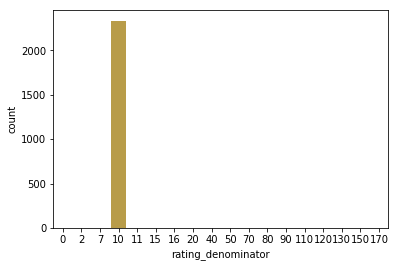

In [18]:
# check denominator with ploting 
plt.figure()
sns.countplot(archive.rating_denominator)

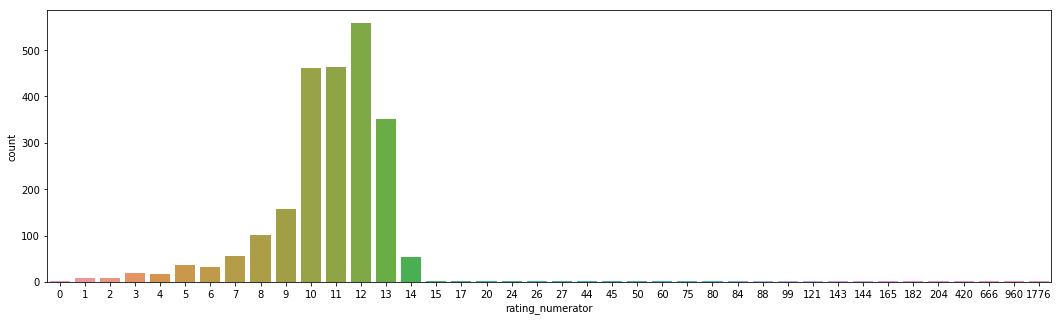

In [19]:
# check numerator with ploting 
plt.figure(figsize=(18,5))
sns.countplot(archive.rating_numerator)

In [20]:
# There are 2 urls in 1 cell
archive['expanded_urls'][7]

'https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1'

In [21]:
# Double urls
double_urls_count = archive.expanded_urls.str.contains(r',').sum()
print(double_urls_count)

639


In [22]:
# Check number of times 'None' show up in a column
def none_count(df_column, name):
    count = 0
    for word in df_column:
        if word == 'None':
            count +=1
    print(name,'column have',count,'None')
none_count(archive['tweet_id'],'tweet_id')
none_count(archive['in_reply_to_status_id'],'in_reply_to_status_id')
none_count(archive['in_reply_to_user_id'],'in_reply_to_user_id')
none_count(archive['timestamp'],'timestamp')
none_count(archive['source'],'source')
none_count(archive['text'],'text')
none_count(archive['retweeted_status_id'],'retweeted_status_id')
none_count(archive['retweeted_status_timestamp'],'retweeted_status_timestamp')
none_count(archive['expanded_urls'],'expanded_urls')
none_count(archive['rating_numerator'],'rating_numerator')
none_count(archive['rating_denominator'],'rating_denominator')
none_count(archive['name'],'name')
none_count(archive['doggo'],'doggo')
none_count(archive['floofer'],'floofer')
none_count(archive['pupper'],'pupper')
none_count(archive['puppo'],'puppo')

tweet_id column have 0 None
in_reply_to_status_id column have 0 None
in_reply_to_user_id column have 0 None
timestamp column have 0 None
source column have 0 None
text column have 0 None
retweeted_status_id column have 0 None
retweeted_status_timestamp column have 0 None
expanded_urls column have 0 None
rating_numerator column have 0 None
rating_denominator column have 0 None
name column have 745 None
doggo column have 2259 None
floofer column have 2346 None
pupper column have 2099 None
puppo column have 2326 None


In [23]:
# Count denominator other than 10
count = 0
for rating in archive['rating_denominator']:
    if rating != 10:
        count += 1
print('number of ratings other than 10', count)

number of ratings other than 10 23


In [24]:
# Count numerator greater than 10
count = 0
for rating in archive['rating_numerator']:
    if rating > 10:
        count += 1
print('number of rating over 10', count)

number of rating over 10 1455


In [25]:
# Check unsual names
archive[archive['name'].apply(len) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


### Images Prediction dataset

In [26]:
images.info()
images.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
images.jpg_url.value_counts()

https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                       

In [28]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


tweet_id should be string

In [29]:
images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

Some predictions are not dog breed. Wile some values have first letter capitalized, and some are not. We will need to convert all values into lower case.

In [30]:
images.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
chow                               20
malinois                           20
miniature_pinscher                 20
Samoyed                            20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [31]:
images.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

True     1532
False     543
Name: p1_dog, dtype: int64


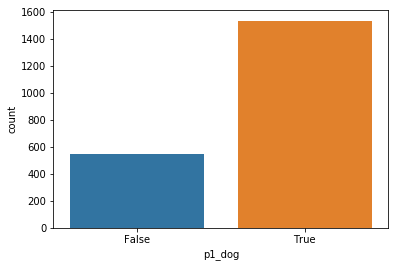

In [32]:
# Check counts of dog 1
print(images['p1_dog'].value_counts())
plt.figure()
sns.countplot(images.p1_dog)

True     1553
False     522
Name: p2_dog, dtype: int64


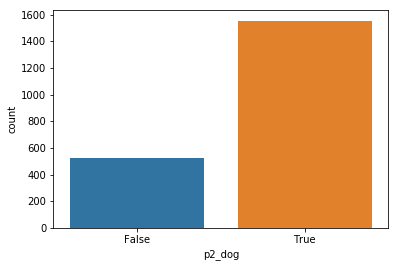

In [33]:
# Check counts of dog 2
print(images['p2_dog'].value_counts())
plt.figure()
sns.countplot(images.p2_dog)

True     1499
False     576
Name: p3_dog, dtype: int64


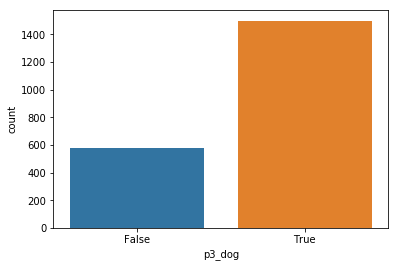

In [34]:
# Check counts of dog 3
print(images['p3_dog'].value_counts())
plt.figure()
sns.countplot(images.p3_dog)

3    1243
2     347
0     324
1     161
Name: count_dog, dtype: int64

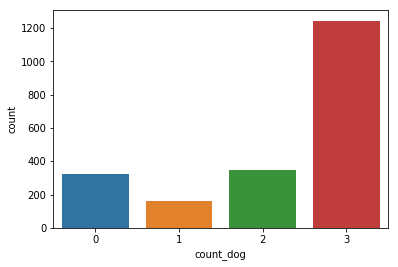

In [35]:
# Check if a dog is not categorized into p1,p2,p3

images_1 = images.copy()

images_1['p1_dog'] = images_1.p1_dog.replace(to_replace=[True, False], value=[1, 0])
images_1['p2_dog'] = images_1.p2_dog.replace(to_replace=[True, False], value=[1, 0])
images_1['p3_dog'] = images_1.p3_dog.replace(to_replace=[True, False], value=[1, 0])

#create a column that count number of time p1_dog, p2_dog, p3_dog shows 0 meaning number of times a tweet's image isn't about a dog
images_1['count_dog']=images_1.iloc[:,[5,8,11]].sum(axis=1)

plt.figure()
sns.countplot(images_1.count_dog)

images_1.count_dog.value_counts()

# a count_dog of 0 means the dog is neither p1,p2 nor p3

In [36]:
images.iloc[1532]

tweet_id                                 789628658055020548
jpg_url     https://pbs.twimg.com/media/CvVTEnPXYAAWLyL.jpg
img_num                                                   1
p1                                                     chow
p1_conf                                            0.260702
p1_dog                                                 True
p2                                                   cougar
p2_conf                                           0.0881427
p2_dog                                                False
p3                                               Pomeranian
p3_conf                                           0.0798831
p3_dog                                                 True
Name: 1532, dtype: object

We will need to clean up p2 and p3 the same way we will for p1

### tweet_json dataset

In [37]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 6 columns):
tweet_id           2344 non-null int64
favorites          2344 non-null int64
retweets           2344 non-null int64
user_followers     2344 non-null int64
user_favourites    2344 non-null int64
date_time          2344 non-null object
dtypes: int64(5), object(1)
memory usage: 110.0+ KB


In [38]:
# Check duplicates
tweet_data[tweet_data.duplicated() == True]

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time


In [39]:
tweet_data.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.344000e+03,2344.000000,2344.000000,2.344000e+03,2344.000000
mean,7.423060e+17,8096.671502,3041.508532,6.629503e+06,132917.979522
std,6.834853e+16,12179.493014,5056.547344,1.693761e+02,0.201379
min,6.660209e+17,0.000000,0.000000,6.629027e+06,132916.000000
25%,6.783704e+17,1406.750000,608.750000,6.629331e+06,132918.000000
50%,7.189556e+17,3548.000000,1420.000000,6.629514e+06,132918.000000
75%,7.986989e+17,10015.500000,3544.500000,6.629651e+06,132918.000000
max,8.924206e+17,143885.000000,77689.000000,6.629803e+06,132918.000000


tweet_id has to be string

### Summary:
* Tidiness:
> The tweet_data, predictions, and archive can be in the same dataframe <br>
> Doggo	floofer	pupper	puppo can be combined into the same column <br>
> tweet_id and jpg_url are the only columns needed in the predictions table
* Quality:
    >Archive dataset: 
    >>Contents of 'text' cutoff <br>
    Incorrect dog names in 'archive' <br>
    Missing values in 'name' and dog stages showing as 'None' <br>
    Rating numerators with decimals not showing full float <br>
    Tweet with more than one #/# sometimes have the first occurence erroneously used for the rating numerators and denominators <br>
    Tweet ID# 810984652412424192 doesn't contain a rating <br>
    Extra characters after '&' <br>
    Sources difficult to read <br>
    Erroneous datatypes (timestamp, source, dog stages, tweet_id, in_reply_to_status_id, in_reply_to_user_id) <br>
    Some values in expanded_urls column contain 2 urls separated by ','
    In several columns null objects are non-null <br>
    Name column have invalid names like 'None', 'a', 'an' and less than 3 characters <br>
    We want to select original tweets (no retweets) that have image <br>

    >Images dataset:
    >>tweet_id needs to be string <br>
    p1,p2,p3 are inconsistent <br>
    there are 347 rows with 'no_dog' recognized <br>
    
    > tweet_data:
    >> change tweet_id to string

## Cleaning Data

In [40]:
# copy dataframe
clean_archive=archive.copy()
clean_image=images.copy()
clean_json=tweet_data.copy()

### 1) Cleaning archive dataset

#### Resolve double urls and missing urls

In [41]:
# clean all urls 
for i in range(len(clean_archive)):
    tweet_id=clean_archive['tweet_id'][i]
    url = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
    clean_archive['expanded_urls'].replace(clean_archive['expanded_urls'][i],url,inplace=True)
# inspiration : https://github.com/pandas-dev/pandas/issues/9106

In [42]:
# confirm 
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [43]:
clean_archive['expanded_urls'][7]

'https://twitter.com/dog_rates/status/890729181411237888'

#### Clean rows with retweets and no-necessary columns

In [44]:
# drop rows
clean_archive = clean_archive[clean_archive['in_reply_to_status_id'].isnull()]
clean_archive = clean_archive[clean_archive['retweeted_status_id'].isnull()]

In [45]:
# drop columns
clean_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

#### Convert timestamp to datetime

In [46]:
# convert
clean_archive['timestamp'] = pd.to_datetime(clean_archive['timestamp'])
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


#### Convert tweet_id to string

In [47]:
clean_archive['tweet_id'] = clean_archive['tweet_id'].astype(str)
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


#### Change 'name' to lower case

In [48]:
clean_archive['name']=clean_archive['name'].str.lower()
clean_archive['name']

0        phineas
1          tilly
2         archie
3          darla
4       franklin
5           none
6            jax
7           none
8           zoey
9         cassie
10          koda
11         bruno
12          none
13           ted
14        stuart
15        oliver
16           jim
17          zeke
18       ralphus
20        gerald
21       jeffrey
22          such
23        canela
24          none
25          none
26          maya
27        mingus
28         derek
29        roscoe
31       waffles
          ...   
2326       quite
2327           a
2328        none
2329        none
2330        none
2331        none
2332        none
2333          an
2334           a
2335          an
2336        none
2337        none
2338        none
2339        none
2340        none
2341        none
2342        none
2343        none
2344        none
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        none
2352           a
2353          

#### Replace 'None' with NaN

In [49]:
# change None with NaN
clean_archive['name'] = clean_archive['name'].replace('None', np.NaN)
clean_archive['doggo'] = clean_archive['doggo'].replace('None', np.NaN)
clean_archive['floofer'] = clean_archive['floofer'].replace('None', np.NaN)
clean_archive['pupper'] = clean_archive['pupper'].replace('None', np.NaN)
clean_archive['puppo'] = clean_archive['puppo'].replace('None', np.NaN)

In [50]:
# confirm
none_count(clean_archive['name'],'name')
none_count(clean_archive['doggo'],'doggo')
none_count(clean_archive['floofer'],'floofer')
none_count(clean_archive['pupper'],'pupper')
none_count(clean_archive['puppo'],'puppo')

name column have 0 None
doggo column have 0 None
floofer column have 0 None
pupper column have 0 None
puppo column have 0 None


#### Issues with numerator and denominator

In [51]:
# dataframe with items to analyze 
to_analyze = clean_archive.loc[clean_archive['rating_denominator']!=10]

to_analyze.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,none,NaN,NaN,NaN,NaN
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,https://twitter.com/dog_rates/status/810984652...,24,7,sam,NaN,NaN,NaN,NaN
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,none,NaN,NaN,NaN,NaN
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,none,NaN,NaN,NaN,NaN
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,NaN,NaN,NaN,NaN


In [52]:
# detect '/10', print text and index
for i in to_analyze['text']:
    if '/10' in i:
        print(i)
        print(to_analyze[to_analyze['text']==i].index)

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Int64Index([1068], dtype='int64')
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Int64Index([1165], dtype='int64')
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Int64Index([1202], dtype='int64')
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Int64Index([1662], dtype='int64')
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Int64Index([2335], dtype='int64')


In [53]:
# clean_archive.loc[clean_archive.index == 1068]
# clean_archive.loc[clean_archive.index == 1165]
# clean_archive.loc[clean_archive.index == 1202]
clean_archive.loc[clean_archive.index == 1662]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,darrel,NaN,NaN,NaN,NaN


In [54]:
# replace data manually
clean_archive.loc[clean_archive.index == 1068, 'rating_numerator'] = 14
clean_archive.loc[clean_archive.index == 1165, 'rating_numerator'] = 13
clean_archive.loc[clean_archive.index == 1202, 'rating_numerator'] = 11
clean_archive.loc[clean_archive.index == 1662, 'rating_numerator'] = 10
clean_archive.loc[clean_archive.index == 2335, 'rating_numerator'] = 9

clean_archive.loc[clean_archive.index == 1068, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1165, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1202, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1662, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 2335, 'rating_denominator'] = 10

#### Correct numerators with decimal

In [55]:
# print index, text and numerator when text numerator contains a decimal
for row in clean_archive['text']:
    pattern = '(\d+\.\d+)\/(\d+)'
    search = re.search(pattern,row)
    if search != None:
        index=clean_archive.loc[clean_archive['text']==row].index[0]
        text = clean_archive.text[index]
        numerator = clean_archive.rating_numerator[index]
        print('index: ',index,'\n',
              'text: ',text,'\n'
              'numerator: ',numerator,'\n',
             )

index:  45 
 text:  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 
numerator:  5 

index:  695 
 text:  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
numerator:  75 

index:  763 
 text:  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 
numerator:  27 

index:  1712 
 text:  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD 
numerator:  26 



In [56]:
# remplace data manually
clean_archive.loc[clean_archive.index == 45, 'rating_numerator'] = 13.5
clean_archive.loc[clean_archive.index == 340, 'rating_numerator'] = 9.75
clean_archive.loc[clean_archive.index == 695, 'rating_numerator'] = 9.75
clean_archive.loc[clean_archive.index == 763, 'rating_numerator'] = 11.27
clean_archive.loc[clean_archive.index == 1689, 'rating_numerator'] = 9.5
clean_archive.loc[clean_archive.index == 1712, 'rating_numerator'] = 11.26

#### Dogs stage cleanup

In [57]:
# function to create a column with information for all stages
def dog_stage(row):
    # list to store data
    stages = []
    # condition
    if row['doggo'] == 'doggo':
        stages.append('doggo')
    if row['floofer'] == 'floofer':
        stages.append('floofer')
    if row['pupper'] == 'pupper':
        stages.append('pupper')
    if row['puppo'] == 'puppo':
        stages.append('puppo')
    if len(stages) < 1: 
        row['stage'] = 'None'
    else: 
        row['stage'] = ' and '.join(stages)
    return row

In [58]:
# Apply to each row
clean_archive = clean_archive.apply(dog_stage, axis=1)

In [59]:
# delete unnecessary columns
clean_archive = clean_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### dogs in different stages:

In [60]:
for index, row in clean_archive.iterrows():
    if ' and ' in row['stage']:
        print (index,row['stage'],'\n',
               row['text'],'\n')

191 doggo and puppo 
 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel 

200 doggo and floofer 
 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk 

460 doggo and pupper 
 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7 

531 doggo and pupper 
 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho 

575 doggo and pupper 
 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj 

705 doggo and pupper 
 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also 

In [61]:
# manual corrections
clean_archive.loc[clean_archive.index == 191, 'stage'] = 'puppo'
clean_archive.loc[clean_archive.index == 200, 'stage'] = 'floofer'
clean_archive.loc[clean_archive.index == 460, 'stage'] = 'pupper'
clean_archive.loc[clean_archive.index == 575, 'stage']  = 'doggo'
clean_archive.loc[clean_archive.index == 705, 'stage'] = 'doggo'
clean_archive.loc[clean_archive.index == 956, 'stage'] = np.NaN

In [62]:
# transform None in NaN
clean_archive['stage']=clean_archive['stage'].replace('None', np.NaN)

In [63]:
# confirm                                                                                                
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
stage                 335 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 243.8+ KB


### Clean image predictions dataset
#### change tweet_id to string

In [64]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
# Change tweet_id to string
clean_image['tweet_id']=clean_image['tweet_id'].astype(str)
#confirm
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### change p1,p2,p3 to lower case

In [66]:
clean_image['p1']=clean_image['p1'].str.lower()
clean_image['p2']=clean_image['p2'].str.lower()
clean_image['p3']=clean_image['p3'].str.lower()
#confirm
clean_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### create a is_dog column

In [67]:
clean_image['is_dog']=images_1['count_dog'].apply(lambda x: False if x==0 else True)
#confirm
clean_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,True


### Clean tweet_data
#### change tweet_id to str and date_time to datetime

In [68]:
clean_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 6 columns):
tweet_id           2344 non-null int64
favorites          2344 non-null int64
retweets           2344 non-null int64
user_followers     2344 non-null int64
user_favourites    2344 non-null int64
date_time          2344 non-null object
dtypes: int64(5), object(1)
memory usage: 110.0+ KB


In [69]:
clean_json['tweet_id']=clean_json['tweet_id'].astype(str)
clean_json['date_time'] = pd.to_datetime(clean_json['date_time'])
#confirm
clean_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 6 columns):
tweet_id           2344 non-null object
favorites          2344 non-null int64
retweets           2344 non-null int64
user_followers     2344 non-null int64
user_favourites    2344 non-null int64
date_time          2344 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 110.0+ KB


### Combine 3 datasets

In [70]:
df_final = clean_archive.merge(clean_image, left_on='tweet_id', right_on ='tweet_id', how='inner')
df_final = df_final.merge(clean_json, left_on='tweet_id', right_on ='tweet_id', how='inner')

In [71]:
df_final.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'is_dog', 'favorites', 'retweets',
       'user_followers', 'user_favourites', 'date_time'],
      dtype='object')

In [72]:
# store consolidated dataset 
df_final.to_csv('twitter_archive_master.csv',index=False)

### Summary: 
>archive: 
>>Resolved double urls and missing urls within 'expanded urls' column <br>
>>Drop unnecessary columns: 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' <br>
>>Convert timestamp to datetime <br>
>>Convert tweet_id to string <br>
>>Replace 'None' with NaN in column 'name' and dog stages columns <br>
>>Change values in 'name' column to lower case <br>
>>For rows that have rating_denominator of other than 10 but contains 10 within the tweet's content, update rating_denominator and numerator according to the tweet <br>
>>Corrected rating_numerator with decimals with incorrect rating_numerator based on tweet <br>
>>Created a new column 'stages' that contains info for all stages and dropped the stage columns <br>

>images:
>>Change tweet_id from int to string <br>
>>Change p1,p2,p3 columns to lower case <br>
>>Created column 'is_dog' to determine if a image is of a dog based on values in p1_dog,p2_dog,p3_dog columns

>tweet_data:
>>Change tweet_id to string <br>
>>Change date_time to datetime <br>

## Investigate data

In [73]:
df=df_final.copy()

In [74]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,is_dog,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,banana,0.076110,False,False,38952,8636,6629272,132918,2017-08-01 16:23:56
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,papillon,0.068957,True,True,33352,6343,6629272,132918,2017-08-01 00:17:27
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,kelpie,0.031379,True,True,25127,4209,6629272,132918,2017-07-31 00:18:03
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,True,spatula,0.040836,False,True,42300,8755,6629272,132918,2017-07-30 15:58:51
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,german_short-haired_pointer,0.175219,True,True,40458,9517,6629272,132918,2017-07-29 16:00:24


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 26 columns):
tweet_id              1970 non-null object
timestamp             1970 non-null datetime64[ns]
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null int64
name                  1970 non-null object
stage                 302 non-null object
jpg_url               1970 non-null object
img_num               1970 non-null int64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null bool
p2                    1970 non-null object
p2_conf               1970 non-null float64
p2_dog                1970 non-null bool
p3                    1970 non-null object
p3_conf               1970 non-null float64
p3_dog                1970 non-null bool
is_dog                1970 non

In [76]:
df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets,user_followers,user_favourites
count,1970.000000,1970.000000,1970.000000,1970.000000,1.970000e+03,1.970000e+03,1970.000000,1970.000000,1.970000e+03,1970.000000
mean,12.172985,10.455330,1.202030,0.594561,1.344611e-01,6.019427e-02,8937.123858,2749.593909,6.629520e+06,132917.980711
std,41.607763,6.790808,0.559144,0.272196,1.009283e-01,5.093855e-02,12666.441927,4737.752157,1.695789e+02,0.195515
min,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,80.000000,13.000000,6.629057e+06,132916.000000
25%,10.000000,10.000000,1.000000,0.363008,5.333950e-02,1.612658e-02,1952.750000,613.250000,6.629344e+06,132918.000000
50%,11.000000,10.000000,1.000000,0.587797,1.172000e-01,4.945765e-02,4068.000000,1332.500000,6.629535e+06,132918.000000
75%,12.000000,10.000000,1.000000,0.848095,1.955197e-01,9.155482e-02,11254.000000,3155.500000,6.629660e+06,132918.000000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,143885.000000,77689.000000,6.629803e+06,132918.000000


In [77]:
# create a rating column
df['rating_ratio']=df['rating_numerator']/df['rating_denominator']

In [78]:
# Set index to be timestamp so time is displayed in x axis
df.set_index('timestamp', inplace=True)

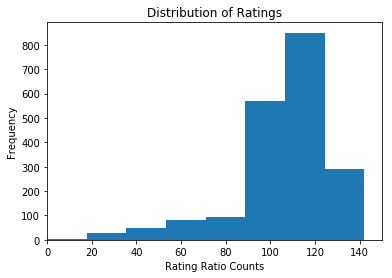

1.200000      450
1.000000      418
1.100000      398
1.300000      254
0.900000      151
0.800000       95
0.700000       51
1.400000       34
0.500000       32
0.600000       32
0.300000       19
0.400000       15
0.200000        9
0.100000        4
1.127000        1
3.428571        1
1.350000        1
1.126000        1
0.975000        1
42.000000       1
177.600000      1
0.000000        1
Name: rating_ratio, dtype: int64

In [79]:
# distribution of ratings on a scale of 100
plt.hist(x = (df.rating_ratio)*100, bins=1000)
plt.xlim(0,150)
plt.title('Distribution of Ratings')
plt.xlabel('Rating Ratio Counts')
plt.ylabel('Frequency')
plt.show()
df.rating_ratio.value_counts()

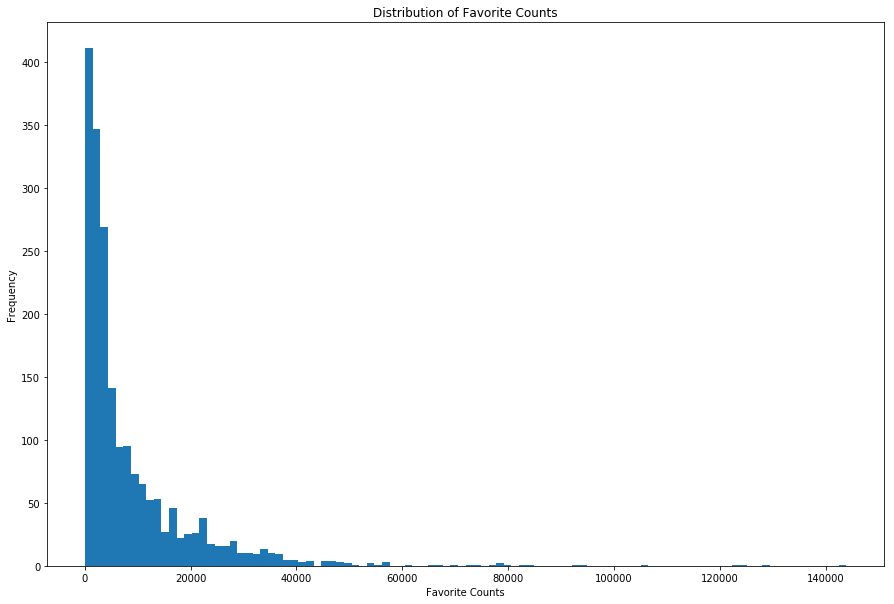

In [80]:
#Distribution of favorites
plt.figure(1, figsize = (15, 10))
plt.hist(x = df.favorites, bins = 100)
plt.title('Distribution of Favorite Counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Frequency')
plt.show()

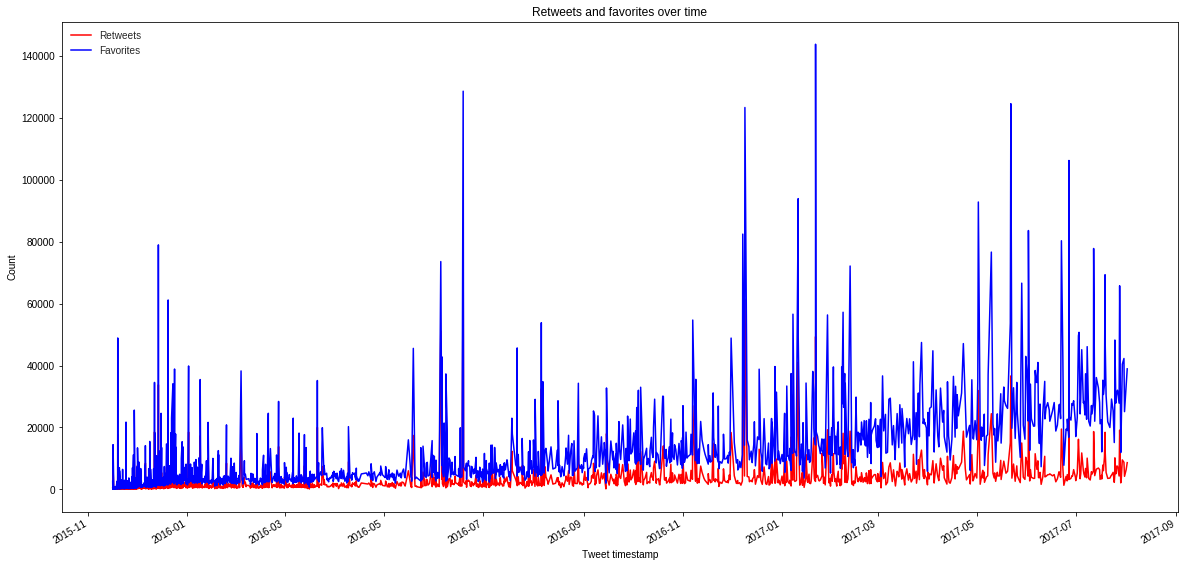

In [81]:
# Number of retweets and favorites overtime
df['retweets'].plot(color = 'red', label='Retweets')
df['favorites'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn')
plt.gcf().set_size_inches(20,10)
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.show()

#### Explore correlations between hour of the day and retweets, and between hour of the day and favorites

Text(0.5,0,'Hours')

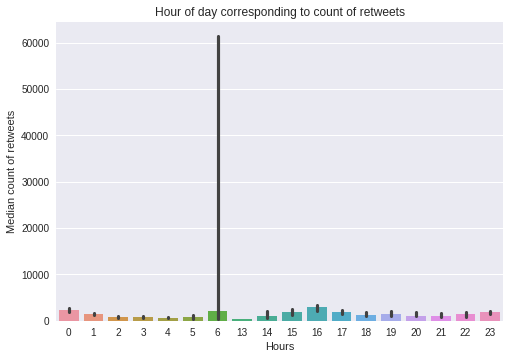

In [84]:
#create a copy of the dataset with the hour in timestamp
df_hour = df_final.copy()

#create hours column
df_hour['hour'] = df_hour['timestamp'].apply(lambda x: x.hour)

#plot
sns.barplot(x="hour", y="retweets", data=df_hour, estimator=median)
plt.title('Hour of day corresponding to count of retweets')
plt.ylabel('Median count of retweets')
plt.xlabel('Hours')

Text(0.5,0,'Hours')

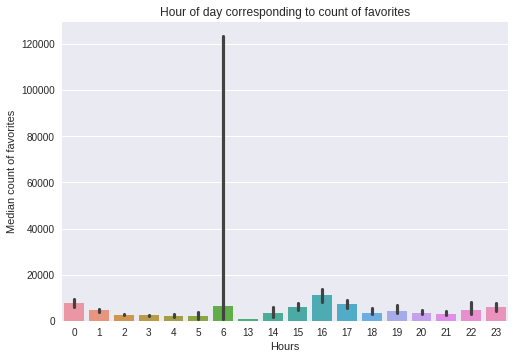

In [88]:
#plot
sns.barplot(x="hour", y="favorites", data=df_hour, estimator=median)
plt.title('Hour of day corresponding to count of favorites')
plt.ylabel('Median count of favorites')
plt.xlabel('Hours')

We can see that tweets posted at 6am will have the most retweets and favorites 

#### Explore correlation between day of the week and retweets, and between day of the week and favorites

Text(0.5,0,'Weekday')

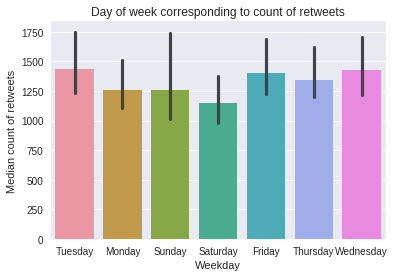

In [103]:
#create a copy of the dataset with the hour in timestamp
df_weekday = df_final.copy()

#create hours column
# df_weekday['weekday'] = df_weekday['timestamp'].apply(lambda x: x.weekday())
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_weekday['weekday'] = df_weekday['timestamp'].dt.dayofweek.map(dayOfWeek)

#plot
sns.barplot(x="weekday", y="retweets", data=df_weekday, estimator=median)
plt.title('Day of week corresponding to count of retweets')
plt.ylabel('Median count of retweets')
plt.xlabel('Weekday')

Text(0.5,0,'Weekday')

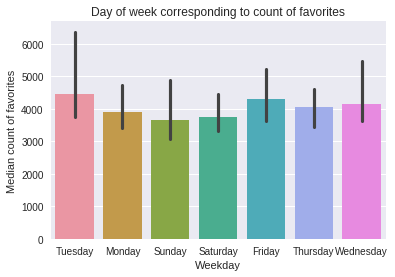

In [104]:
sns.barplot(x="weekday", y="favorites", data=df_weekday, estimator=median)
plt.title('Day of week corresponding to count of favorites')
plt.ylabel('Median count of favorites')
plt.xlabel('Weekday')

We can see most tweets posted on Tuesday, Wednesday, Friday and Sunday has the most retweets and favorites

#### Explore correlation between day of the month and retweets, and between day of the month and favorites

Text(0.5,0,'Day')

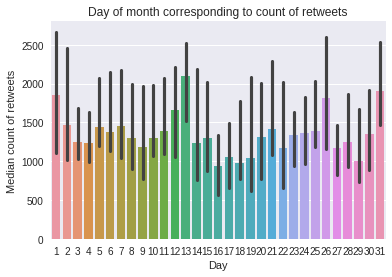

In [95]:
#create a copy of the dataset with the hour in timestamp
df_day = df_final.copy()

#create hours column
df_day['day'] = df_day['timestamp'].apply(lambda x: x.day)

#plot
sns.barplot(x="day", y="retweets", data=df_day, estimator=median)
plt.title('Day of month corresponding to count of retweets')
plt.ylabel('Median count of retweets')
plt.xlabel('Day')

Text(0.5,0,'Day')

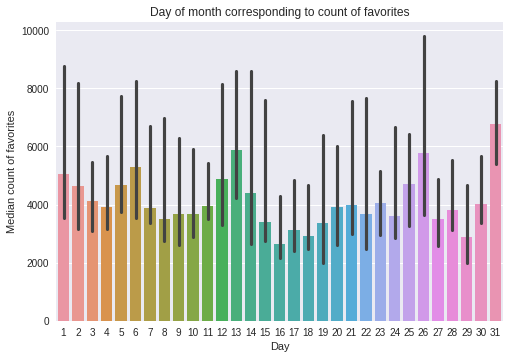

In [89]:
#plot
sns.barplot(x="day", y="favorites", data=df_day, estimator=median)
plt.title('Day of month corresponding to count of favorites')
plt.ylabel('Median count of favorites')
plt.xlabel('Day')

We can see that the 1st, 13th, 26th and 31st posts have the most retweets and favorites

#### Explore the correlation between breeds and retweets, and between breeds and favorites

In [120]:
#create a copy of the dataset with the hour in timestamp
df_breed = df_final.copy()

373


In [121]:
df_breed['p1'].value_counts()

golden_retriever             137
labrador_retriever            93
pembroke                      88
chihuahua                     78
pug                           54
chow                          41
samoyed                       40
pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            21
seat_belt                     21
german_shepherd               20
siberian_husky                20
staffordshire_bullterrier     19
shetland_sheepdog             18
maltese_dog                   18
eskimo_dog                    18
cardigan                      17
shih-tzu                      17
beagle                        17
teddy                         17
rottweiler                    16
italian_greyhound             16
lakeland_terrier              15
kuvasz                        15
great_pyrenees                14
          

We only care if frequency is greater than 23

In [128]:
#create a dict of frequency per dog breeds
frequency = df_breed['p1'].value_counts().to_dict()

# convert the frequency dict to retweets_by_breed (rbb) dataframe
rbb=pd.DataFrame(list(frequency.items()),columns=['breed','frequency'])

#drop frequency <26
rbb.drop(rbb[rbb.frequency<26].index,inplace=True)

# add column retweets
retweets=[]
for i in rbb['breed']:
    total_retweets=df_breed[df_breed['p1']==i]['retweets'].sum()
    retweets.append(total_retweets)
rbb['retweets']=retweets

# add column favorites
favorites=[]
for i in rbb['breed']:
    total_favorites=df_breed[df_breed['p1']==i]['favorites'].sum()
    favorites.append(total_favorites)
rbb['favorites']=favorites
rbb.head()

,breed,frequency,retweets,favorites
0,golden_retriever,137,494409,1684188
1,labrador_retriever,93,354252,1092297
2,pembroke,88,276009,996938
3,chihuahua,78,220275,680087
4,pug,54,96722,314450


Text(0.5,0,'Breeds')

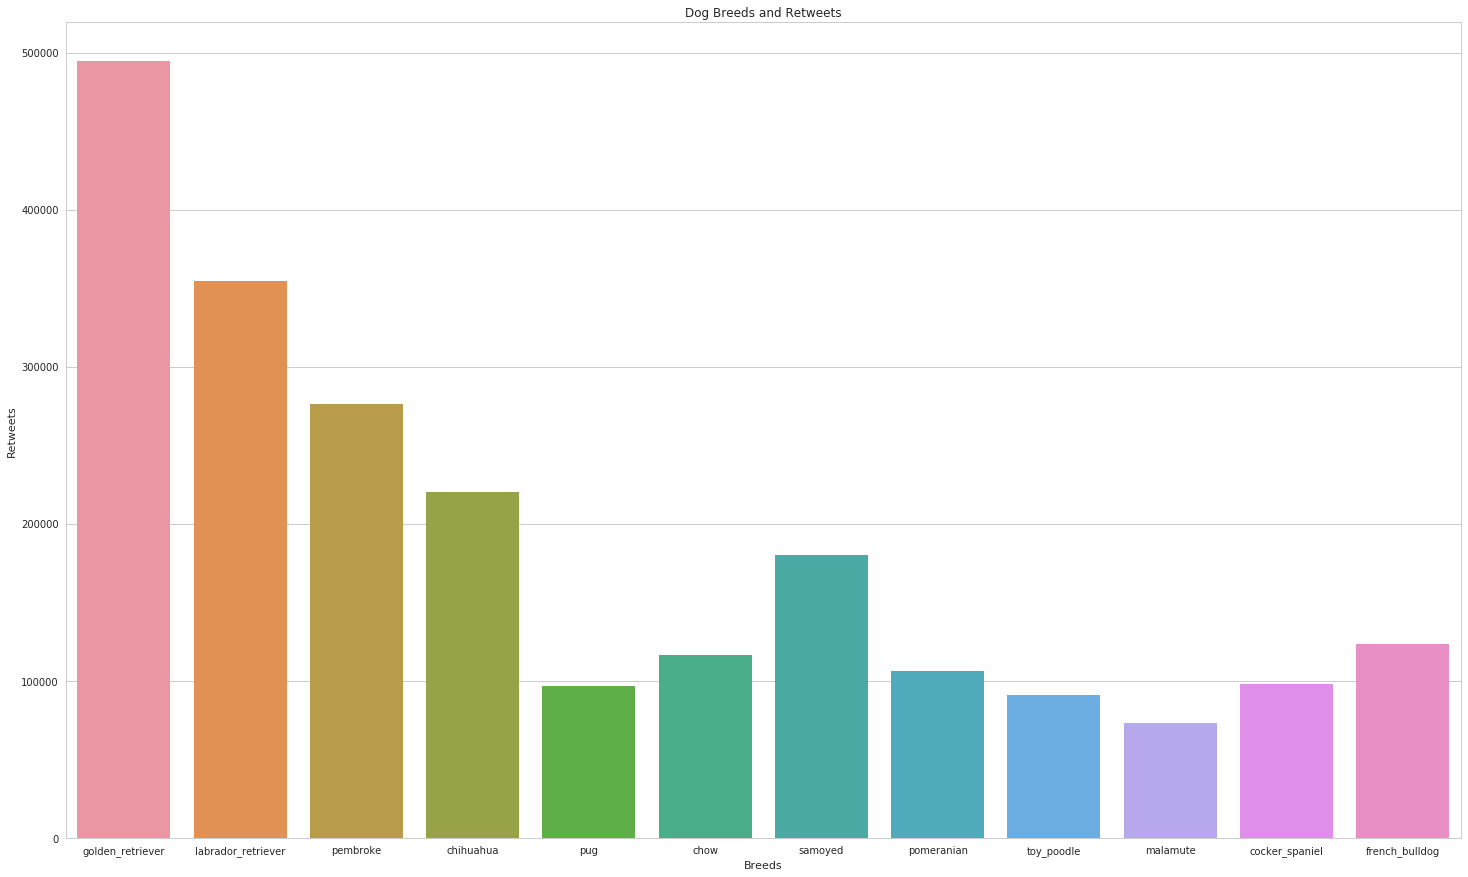

In [127]:
#plot
sns.set(rc={'figure.figsize':(25,15)})
sns.set_style('whitegrid')
g = sns.barplot(x='breed', y='retweets', data=rbb)
g.set_ylabel('Retweets')

plt.title('Dog Breeds and Retweets')
plt.xlabel('Breeds')

Text(0.5,0,'Breeds')

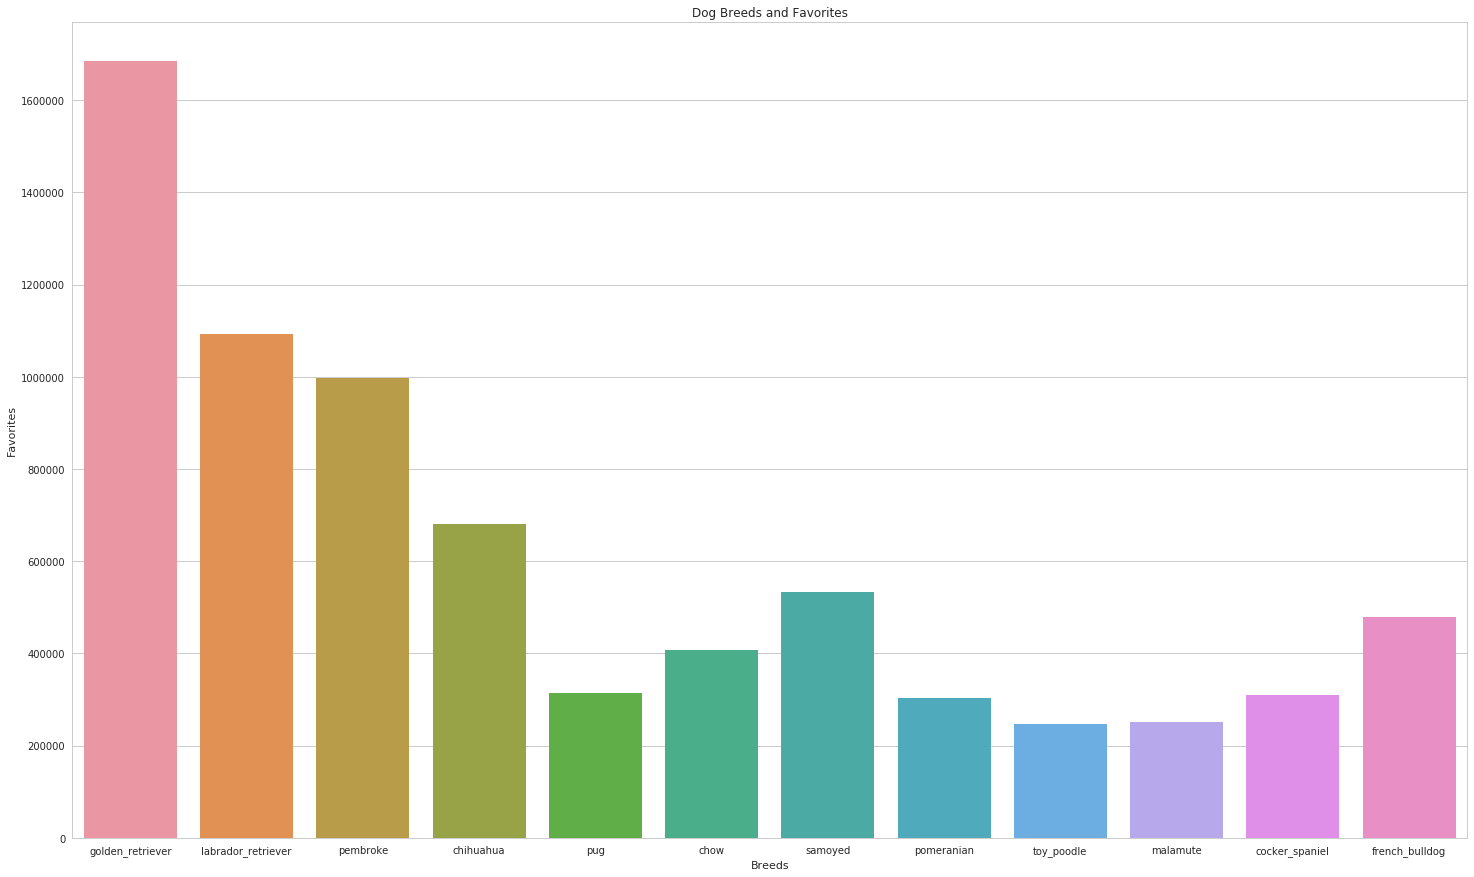

In [129]:
#plot
sns.set(rc={'figure.figsize':(25,15)})
sns.set_style('whitegrid')
g = sns.barplot(x='breed', y='favorites', data=rbb)
g.set_ylabel('Favorites')

plt.title('Dog Breeds and Favorites')
plt.xlabel('Breeds')

## Conclusions:
According to this dataset: <br>
>tweets that are posted at 6am have the most retweets and favorites. <br>
>tweets posted on Tuesday receive the most retweets and favorites <br>
>tweets posted on the 1st and 26th of the month have the most retweets and favorites <br>
>posts about golden_retriever, labrador_retriever, pembroke and chihuahua receive the most retweets and favorites <br>